1. 환경 설정 및 데이터 로드 📊
- 라이브러리 설치 : pandas, matplotlib, seaborn, transformers 등 데이터 분석, 시각화, 모델 학습에 필요한 라이브러리들을 설치하고 불러옵니다.
- 한글 폰트 설정 : matplotlib에서 그래프를 그릴 때 한글이 깨지지 않도록 나눔고딕 폰트를 설정합니다.
- 데이터셋 로드 : 지도 학습(SFT)과 보상 모델링(RM)을 위한 두 종류의 KoChatGPT 데이터(kochatgpt_1_SFT.jsonl, kochatgpt_2_RM.jsonl)를 로드하여 pandas DataFrame으로 변환합니다.

2. 데이터 분석 및 시각화 📈
- SFT 데이터 분석 : 'prompt'(지시)와 'completion'(응답)의 글자 수 길이를 계산하고, 이에 대한 기초 통계(평균, 표준편차, 최소/최대값 등)를 출력합니다. 길이 분포를 히스토그램으로 시각화하여 데이터의 특징을 파악합니다.
- RM 데이터 분석 : 'prompt'와 3개의 다른 응답(completion_0, completion_1, completion_2)의 길이를 분석하고, 마찬가지로 통계 정보를 출력하고 히스토그램으로 시각화합니다.

In [1]:
# 1. 필요한 라이브러리 설치
!pip install pandas matplotlib seaborn jsonlines

# 2. 라이브러리 임포트
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

!sudo apt update
!sudo apt install fonts-nanum -y

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import logging

Hit:1 http://security.ubuntu.com/ubuntu noble-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu noble InRelease
Hit:3 http://archive.ubuntu.com/ubuntu noble-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu noble-backports InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
61 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 61 not upgraded.


In [2]:
# !sudo apt update
# !sudo apt install fonts-nanum -y

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import logging

logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

fontpath = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
fontprop = fm.FontProperties(fname=fontpath, size=12)
plt.rcParams["font.family"] = fontprop.get_name()

print(f"설정된 폰트: {fontprop.get_name()}")

설정된 폰트: NanumBarunGothic


In [3]:
# 3. 데이터셋 로드 함수
def load_json(file_path): # 함수 이름을 load_json으로 변경하는 것을 추천합니다.
    """json 파일을 읽어 Python 리스트로 반환합니다."""
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    return data

# 4. 데이터셋 파일 경로
sft_file_path = './KoChatGPT/data_kochatgpt/kochatgpt_1_SFT.jsonl'
rm_file_path = './KoChatGPT/data_kochatgpt/kochatgpt_2_RM.jsonl'

# 5. 데이터 로드 및 DataFrame 변환
try:
    sft_data = load_json(sft_file_path)
    rm_data = load_json(rm_file_path)

    sft_df = pd.DataFrame(sft_data)
    rm_df = pd.DataFrame(rm_data)

    print("SFT, RM 데이터셋 로드 성공!")
    print(f"SFT 데이터 샘플 수: {len(sft_df)}")
    print(f"RM 데이터 샘플 수 : {len(rm_df)}")

except FileNotFoundError as e:
    print(f"오류: 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    print(f"에러 메시지: {e}")
except Exception as e:
    print(f"알 수 없는 오류가 발생했습니다: {e}")

SFT, RM 데이터셋 로드 성공!
SFT 데이터 샘플 수: 12000
RM 데이터 샘플 수 : 10220



--- SFT 데이터셋 분석 ---

[SFT 데이터 길이 통계 (글자 수)]
         prompt_len  completion_len
count  12000.000000    12000.000000
mean      22.180583      144.107250
std       14.110028      122.843692
min        0.000000        4.000000
25%       13.000000       62.000000
50%       19.000000      118.000000
75%       28.000000      185.000000
max      295.000000     1553.000000


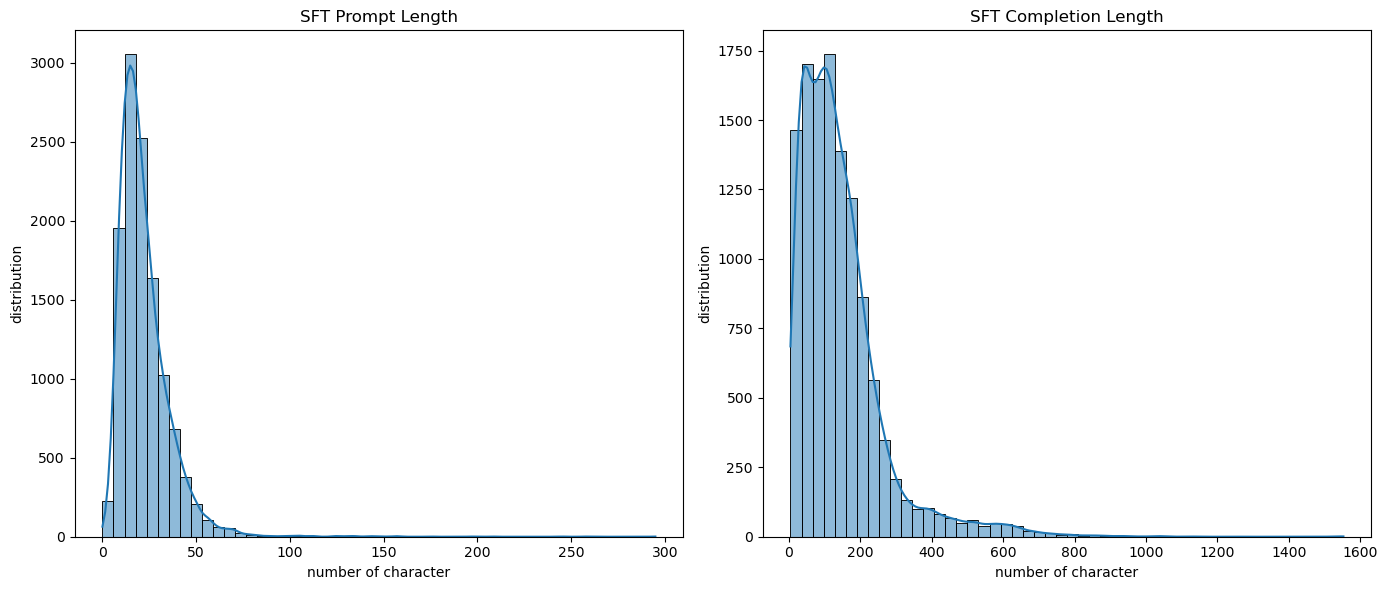

In [8]:
# 6. SFT 데이터셋 분석
if not sft_df.empty:
    print("\n--- SFT 데이터셋 분석 ---")
    # 'completion' 컬럼의 타입이 문자열이 아닐 경우를 대비하여 처리

    sft_df['prompt_len'] = sft_df['prompt'].str.len()
    sft_df['completion_len'] = sft_df['completion'].apply(lambda x: len(str(x)))

    print("\n[SFT 데이터 길이 통계 (글자 수)]")
    print(sft_df[['prompt_len', 'completion_len']].describe())

    # SFT 데이터 길이 분포 시각화
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(sft_df['prompt_len'], kde=True, bins=50)
    plt.title('SFT Prompt Length')
    plt.xlabel('number of character')
    plt.ylabel('distribution')

    plt.subplot(1, 2, 2)
    sns.histplot(sft_df['completion_len'], kde=True, bins=50)
    plt.title('SFT Completion Length')
    plt.xlabel('number of character')
    plt.ylabel('distribution')

    plt.tight_layout()
    plt.show()


--- RM 데이터셋 분석 ---

[RM 데이터 길이 통계 (글자 수)]
         prompt_len  completion_0_len  completion_1_len  completion_2_len
count  10220.000000      10220.000000      10220.000000      10220.000000
mean      22.203229        117.493151        116.805675        116.005479
std       14.297097        120.476514        126.148677        120.154507
min        0.000000          0.000000          0.000000          0.000000
25%       13.000000         42.000000         42.000000         41.000000
50%       19.000000        102.000000        100.500000         99.500000
75%       28.000000        143.000000        143.000000        142.000000
max      295.000000       3088.000000       3694.000000       2979.000000


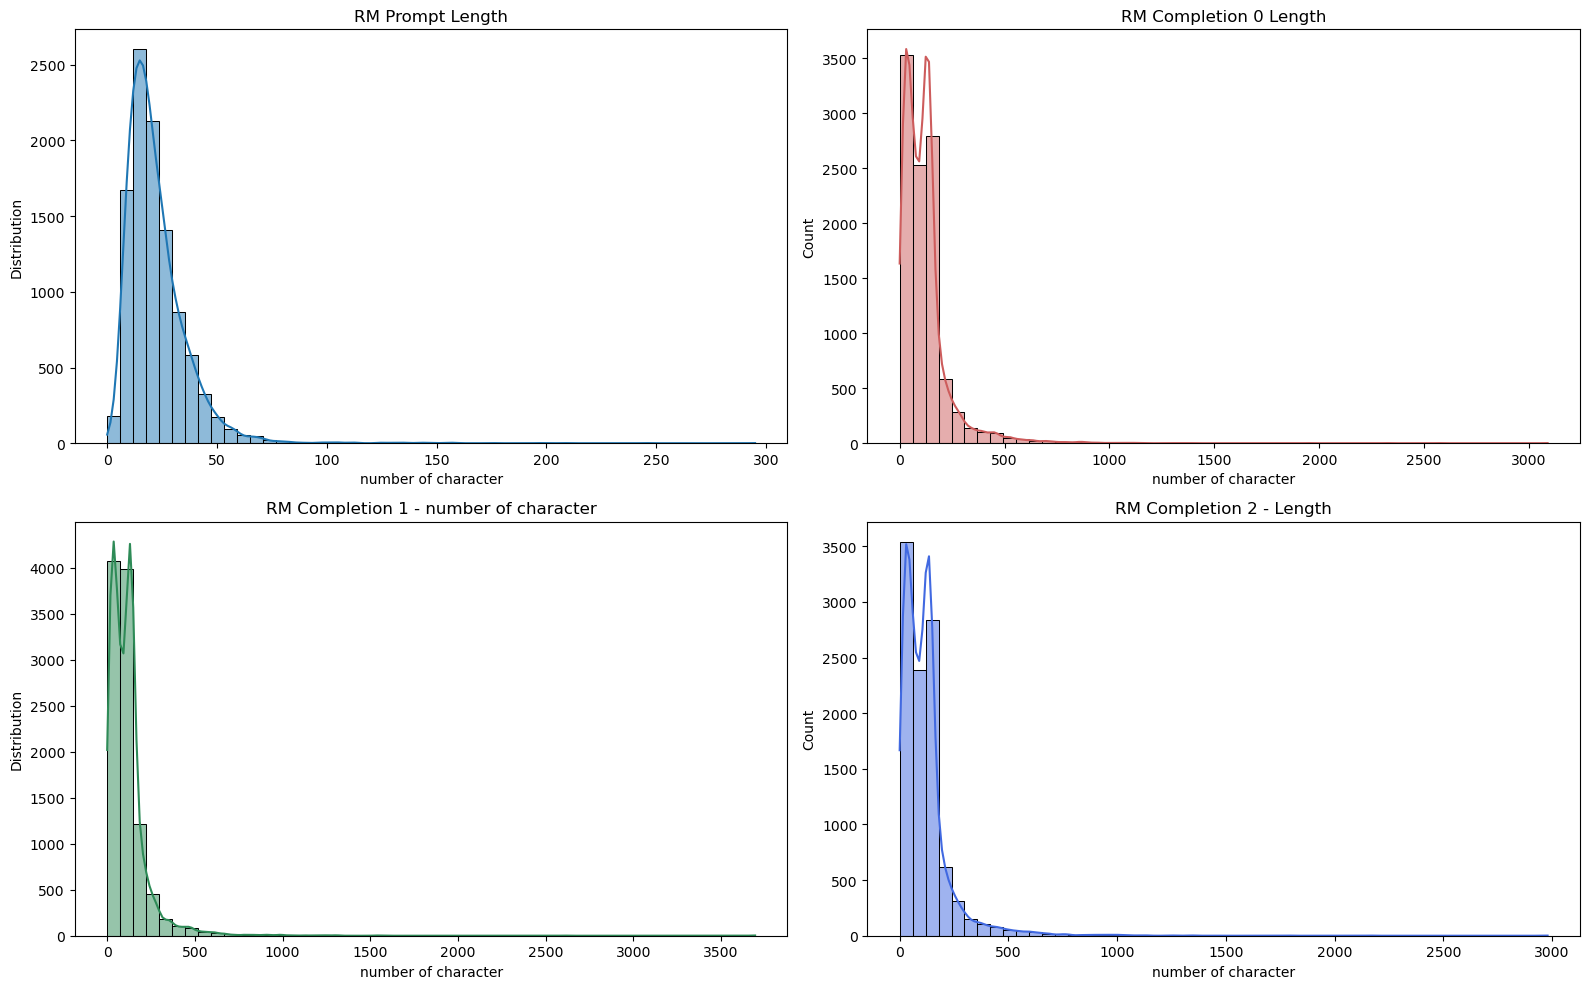

In [9]:
# 7. RM 데이터셋 분석
if not rm_df.empty:
    print("\n--- RM 데이터셋 분석 ---")
    rm_df['prompt_len'] = rm_df['prompt'].str.len()
    rm_df['completion_0_len'] = rm_df['completion_0'].str.len()
    rm_df['completion_1_len'] = rm_df['completion_1'].str.len()
    rm_df['completion_2_len'] = rm_df['completion_2'].str.len()

    print("\n[RM 데이터 길이 통계 (글자 수)]")
    print(rm_df[['prompt_len', 'completion_0_len', 'completion_1_len', 'completion_2_len']].describe())

    # RM 데이터 길이 분포 시각화
    plt.figure(figsize=(16, 10))

    plt.subplot(2, 2, 1)
    sns.histplot(rm_df['prompt_len'], kde=True, bins=50)
    plt.title('RM Prompt Length')
    plt.xlabel('number of character')
    plt.ylabel('Distribution')

    plt.subplot(2, 2, 2)
    sns.histplot(rm_df['completion_0_len'], kde=True, bins=50, color='indianred')
    plt.title('RM Completion 0 Length')
    plt.xlabel('number of character')

    plt.subplot(2, 2, 3)
    sns.histplot(rm_df['completion_1_len'], kde=True, bins=50, color='seagreen')
    plt.title('RM Completion 1 - number of character')
    plt.xlabel('number of character')
    plt.ylabel('Distribution')

    plt.subplot(2, 2, 4)
    sns.histplot(rm_df['completion_2_len'], kde=True, bins=50, color='royalblue')
    plt.title('RM Completion 2 - Length')
    plt.xlabel('number of character')

    plt.tight_layout()
    plt.show()

3. 데이터 정제(Cleaning) 🧹
- 텍스트 정규화 : 불필요한 공백이나 특정 특수문자를 제거하는 함수를 정의하여 텍스트 데이터를 깨끗하게 만듭니다.
- 중복 및 길이 필터링 :
    - SFT 데이터 : 중복된 데이터를 제거하고, 너무 짧거나 긴(prompt 10자 미만, completion 20자 미만) 데이터를 제거하여 총 9,700개의 데이터를 정제합니다.
    - RM 데이터 : 중복된 데이터를 제거하고, 너무 짧은 데이터(prompt 및 모든 completion 10자 미만)를 제거하여 총 7,806개의 데이터를 정제합니다.
- 저장 : 정제된 데이터는 각각 별도의 파일(kochatgpt_1_SFT_cleaned.jsonl, kochatgpt_2_RM_cleaned.jsonl)로 저장하여 다음 단계에서 사용합니다.

In [11]:
import re

# 텍스트 정규화 함수
def normalize_text(text):
    """불필요한 공백과 일부 특수문자를 정리합니다."""
    # 타입이 문자열이 아닐 경우 대비
    text = str(text)
    # 연속된 공백을 하나의 공백으로 변경
    text = re.sub(r'\s+', ' ', text).strip()
    # 일부 불필요한 시작 특수문자 제거 ('는 대화체에서 자주 쓰이므로 유지)
    text = re.sub(r"^'|\"", "", text)
    return text

# SFT 데이터셋 정제
if not sft_df.empty:
    print("\n--- SFT 데이터셋 정제 시작 ---")
    initial_rows = len(sft_df)
    print(f"초기 데이터 수: {initial_rows}")

    # 텍스트 정규화 적용
    sft_df['prompt'] = sft_df['prompt'].apply(normalize_text)
    sft_df['completion'] = sft_df['completion'].apply(normalize_text)

    # 중복 데이터 제거
    sft_df.drop_duplicates(subset=['prompt'], inplace=True)
    sft_df.drop_duplicates(subset=['completion'], inplace=True)
    rows_after_dedup = len(sft_df)
    print(f"중복 제거 후 데이터 수: {rows_after_dedup} ({initial_rows - rows_after_dedup}개 제거)")

    # 길이 기반 필터링
    # 너무 짧거나 긴 텍스트를 가진 행 제거
    min_len_prompt = 10
    min_len_completion = 20
    max_len = 2048 # 모델의 최대 토큰 길이를 고려

    sft_df = sft_df[sft_df['prompt'].str.len() > min_len_prompt]
    sft_df = sft_df[sft_df['completion'].str.len() > min_len_completion]
    sft_df = sft_df[sft_df['prompt'].str.len() < max_len]
    sft_df = sft_df[sft_df['completion'].str.len() < max_len]
    rows_after_len_filter = len(sft_df)
    print(f"길이 필터링 후 데이터 수: {rows_after_len_filter} ({rows_after_dedup - rows_after_len_filter}개 제거)")

    # 정제된 데이터 저장
    sft_cleaned_path = 'kochatgpt_1_SFT_cleaned.jsonl'
    # 'tokens' 컬럼이 있다면 제외하고 저장
    sft_df_to_save = sft_df[['prompt', 'completion']]
    sft_df_to_save.to_json(sft_cleaned_path, orient='records', lines=True, force_ascii=False)
    print(f"정제된 SFT 데이터 {len(sft_df)}개를 '{sft_cleaned_path}'에 저장했습니다.")


--- SFT 데이터셋 정제 시작 ---
초기 데이터 수: 12000
중복 제거 후 데이터 수: 11920 (80개 제거)
길이 필터링 후 데이터 수: 9700 (2220개 제거)
정제된 SFT 데이터 9700개를 'kochatgpt_1_SFT_cleaned.jsonl'에 저장했습니다.


In [12]:
# 7. RM 데이터셋 정제
if not rm_df.empty:
    print("\n--- RM 데이터셋 정제 시작 ---")
    initial_rows = len(rm_df)
    print(f"초기 데이터 수: {initial_rows}")

    # 7.1. 텍스트 정규화
    for col in ['prompt', 'completion_0', 'completion_1', 'completion_2']:
        rm_df[col] = rm_df[col].apply(normalize_text)

    # 7.2. 중복 제거 (prompt 기준)
    rm_df.drop_duplicates(subset=['prompt'], inplace=True)
    rows_after_dedup = len(rm_df)
    print(f"중복 제거 후 데이터 수: {rows_after_dedup} ({initial_rows - rows_after_dedup}개 제거)")

    # 7.3. 길이 필터링
    rm_df = rm_df[rm_df['prompt'].str.len() > min_len_prompt]
    # completion 3개 모두 길이가 10 이상인 경우만 남김
    rm_df = rm_df[(rm_df['completion_0'].str.len() > 10) &
                    (rm_df['completion_1'].str.len() > 10) &
                    (rm_df['completion_2'].str.len() > 10)]
    rows_after_len_filter = len(rm_df)
    print(f"길이 필터링 후 데이터 수: {rows_after_len_filter} ({rows_after_dedup - rows_after_len_filter}개 제거)")

    # 7.4. 정제된 데이터 저장
    rm_cleaned_path = 'kochatgpt_2_RM_cleaned.jsonl'
    rm_df.to_json(rm_cleaned_path, orient='records', lines=True, force_ascii=False)
    print(f"정제된 RM 데이터 {len(rm_df)}개를 '{rm_cleaned_path}'에 저장했습니다.")


--- RM 데이터셋 정제 시작 ---
초기 데이터 수: 10220
중복 제거 후 데이터 수: 10181 (39개 제거)
길이 필터링 후 데이터 수: 7806 (2375개 제거)
정제된 RM 데이터 7806개를 'kochatgpt_2_RM_cleaned.jsonl'에 저장했습니다.


4. 모델 미세 조정(Fine-Tuning) 🧠
모델 및 토크나이저 로드: SKT에서 개발한 kogpt2-base-v2 모델과 토크나이저를 불러옵니다.

- 데이터셋 준비 : 정제된 SFT 데이터를 모델 학습에 적합한 형식(Instruction-Response 템플릿 적용, 토큰화, 레이블 마스킹 등)으로 가공하는 사용자 정의 PyTorch Dataset 클래스를 만듭니다.
- 학습 실행 : Transformers 라이브러리의 Trainer를 사용하여 미세 조정을 시작합니다.

In [1]:
!pip install transformers datasets accelerate

In [2]:
import os
import json
import torch
import transformers
from typing import Optional, Dict, Sequence
from torch.utils.data import Dataset
from dataclasses import dataclass
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments

# 명시적으로 device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# 1. 모델 및 토크나이저 설정
MODEL_NAME = 'skt/kogpt2-base-v2'
tokenizer = AutoTokenizer.from_pretrained(
    MODEL_NAME, bos_token='</s>', eos_token='</s>', unk_token='<unk>', pad_token='<pad>',
    padding_side="right",
    model_max_length=512,
)

model = AutoModelForCausalLM.from_pretrained(MODEL_NAME)
model.to(device)  # 모델을 GPU로 확실하게 보냅니다.

# 토크나이저의 단어 사전 크기에 맞게 모델의 임베딩 크기를 조절합니다.
model.resize_token_embeddings(len(tokenizer))


# 2. 프롬프트 템플릿 정의
# KoChatGPT는 아래와 같은 형식의 프롬프트를 사용합니다.
PROMPT_DICT = {
    "prompt_input": (
        "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
    )
}


# 3. 데이터셋 클래스 및 전처리 함수 정의
def _preprocess_function(strings: Sequence[str], tokenizer: transformers.PreTrainedTokenizer) -> Dict:
    """주어진 문자열 리스트를 토큰화합니다."""
    tokenized_list = [
        tokenizer(
            text,
            return_tensors="pt",
            padding="longest",
            max_length=tokenizer.model_max_length,
            truncation=True,
        )
        for text in strings
    ]
    
    input_ids = labels = [tokenized.input_ids[0] for tokenized in tokenized_list]
    input_ids_lens = labels_lens = [
        tokenized.input_ids.ne(tokenizer.pad_token_id).sum().item() for tokenized in tokenized_list
    ]
    
    return dict(
        input_ids=input_ids,
        labels=labels,
        input_ids_lens=input_ids_lens,
        labels_lens=labels_lens,
    )

class SFT_dataset(Dataset):
    """SFT 학습을 위한 데이터셋 클래스"""
    def __init__(self, data_path: str, tokenizer: transformers.PreTrainedTokenizer):
        super(SFT_dataset, self).__init__()
        
        # 정제된 jsonl 파일 로드
        with open(data_path, "r", encoding='utf-8-sig') as json_file:
            list_data_dict = json.load(json_file)

        prompt_input = PROMPT_DICT["prompt_input"]
        
        # 프롬프트 형식에 맞게 데이터 가공
        sources = [prompt_input.format_map(example) for example in list_data_dict]
        targets = [f"{example['completion']}{tokenizer.eos_token}" for example in list_data_dict]

        # 소스와 타겟을 합쳐 전체 대화 생성
        data = [source + target for source, target in zip(sources, targets)]
        
        # 전체 대화 토큰화
        data_dict = _preprocess_function(data, tokenizer)

        self.input_ids = data_dict["input_ids"]
        self.labels = data_dict["labels"]
        
        # Instruction 부분은 Loss 계산에서 제외하기 위해 -100으로 마스킹
        source_dict = _preprocess_function(sources, tokenizer)
        self._mask_target_only_loss(source_dict["input_ids_lens"])

    def _mask_target_only_loss(self, source_lens):
        for label, source_len in zip(self.labels, source_lens):
            label[:source_len] = -100
            
    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, i) -> Dict[str, torch.Tensor]:
        return dict(input_ids=self.input_ids[i], labels=self.labels[i])

@dataclass
class DataCollatorForSupervisedDataset(object):
    """배치 처리를 위한 데이터 콜레이터"""
    tokenizer: transformers.PreTrainedTokenizer

    def __call__(self, instances: Sequence[Dict]) -> Dict[str, torch.Tensor]:
        input_ids, labels = tuple([instance[key] for instance in instances] for key in ("input_ids", "labels"))
        
        # 배치 내 가장 긴 길이에 맞춰 패딩
        input_ids = torch.nn.utils.rnn.pad_sequence(
            input_ids, batch_first=True, padding_value=self.tokenizer.pad_token_id
        )
        labels = torch.nn.utils.rnn.pad_sequence(labels, batch_first=True, padding_value=-100)
        
        return dict(
            input_ids=input_ids,
            labels=labels,
            attention_mask=input_ids.ne(self.tokenizer.pad_token_id),
        )

In [3]:
# 4. 데이터셋 및 데이터 콜레이터 인스턴스 생성
cleaned_sft_path = 'kochatgpt_1_SFT_cleaned.jsonl' 

# json 파일 형식에 맞게 변환
# to_json(orient='records')는 json 객체 리스트 형태이므로, json.load로 바로 읽을 수 있게 대괄호로 감싸줍니다.
with open(cleaned_sft_path, 'r', encoding='utf-8') as f:
    data = f.read()
with open('temp_sft.json', 'w', encoding='utf-8') as f:
    f.write(f'[{",".join(data.splitlines())}]')


train_dataset = SFT_dataset(data_path='temp_sft.json', tokenizer=tokenizer)
data_collator = DataCollatorForSupervisedDataset(tokenizer=tokenizer)


# 5. 트레이너 설정 및 학습 시작
training_args = TrainingArguments(
    output_dir="sft-kogpt2-cleaned",  # 학습 결과물 저장 경로
    overwrite_output_dir=True,
    num_train_epochs=3,              # 에폭 수 (시간에 따라 1~3으로 조절)
    per_device_train_batch_size=4,   # 배치 사이즈 (GPU 메모리에 따라 조절)
    gradient_accumulation_steps=4,   # 그래디언트 축적 (메모리 부족 시 늘림)
    warmup_steps=5,
    prediction_loss_only=True,
    fp16=True,                       # 반정밀도 학습 (학습 속도 향상)
    logging_steps=50,
    save_steps=500,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset
)

print("SFT 모델 학습을 시작합니다. (데이터 정제 버전)")
trainer.train()

# 6. 학습된 모델 저장
output_dir = "here_models/output_sft_cleaned"
print(f"학습 완료! 모델을 {output_dir}에 저장합니다.")
model.save_pretrained(output_dir)

SFT 모델 학습을 시작합니다. (데이터 정제 버전)


/pytorch/aten/src/ATen/native/cuda/Indexing.cu:1553: indexSelectLargeIndex: block: [47,0,0], thread: [0,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/pytorch/aten/src/ATen/native/cuda/Indexing.cu:1553: indexSelectLargeIndex: block: [47,0,0], thread: [1,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/pytorch/aten/src/ATen/native/cuda/Indexing.cu:1553: indexSelectLargeIndex: block: [47,0,0], thread: [2,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/pytorch/aten/src/ATen/native/cuda/Indexing.cu:1553: indexSelectLargeIndex: block: [47,0,0], thread: [3,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/pytorch/aten/src/ATen/native/cuda/Indexing.cu:1553: indexSelectLargeIndex: block: [47,0,0], thread: [4,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/pytorch/aten/src/ATen/native/cuda/Indexing.cu:1553: indexSelectLargeIndex: block: [47,0,0], thread: [5,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/pytorch/aten/src/ATen/native/cuda/Indexing.cu:1553: index

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
# 7. 추론 테스트
print("\n--- 추론 테스트 시작 ---")
generator = transformers.pipeline('text-generation', model=output_dir, tokenizer=tokenizer)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=64,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

list_prompt = ['불고기용 고기 한우에요?',
               '리처드 닉슨이 43대 부통령직을 수행한 년도는?',
               '시카고 오헤어 국제공항은 어디에 있어?',
               '오늘 미세먼지 어때?']

list_prompt_formatted = [PROMPT_DICT['prompt_input'].format_map({'prompt' : tmp}) for tmp in list_prompt]

list_result = generator(list_prompt_formatted, **generation_args)
for prompt, result in zip(list_prompt, list_result):
    print(f"\n명령어: {prompt}")
    # 생성된 텍스트에서 프롬프트 부분을 제외하고 출력
    response = result[0]['generated_text'].split('### Response(응답):')[1].strip()
    print(f"응답: {response}")